In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
centers = np.array([[-13, 4], [20, 3], [45, 9]])

centers

array([[-13,   4],
       [ 20,   3],
       [ 45,   9]])

In [112]:
def gen(centers, sample=10, distance=5):
    X = centers[:, 0]
    Y = centers[:, 1]

    _X = np.array([])
    _Y = np.array([])

    for x in X:
        temp = x + np.random.randn(sample) * distance
        _X = np.concatenate([_X, temp])

    for y in Y:
        temp = y + np.random.randn(sample)
        _Y = np.concatenate([_Y, temp])

    return _X, _Y


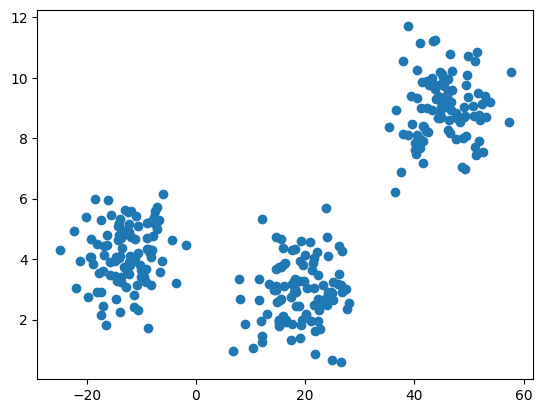

In [113]:
X, Y = gen(centers, sample=100)

plt.scatter(x=X, y=Y)
plt.show()

In [114]:
X = np.column_stack([X, Y])

X

array([[-24.90765962,   4.29498488],
       [ -6.77028476,   5.28291175],
       [-14.09680154,   4.03255117],
       [-12.19419122,   3.49697748],
       [-19.29493607,   4.07709554],
       [-18.12649729,   4.5016313 ],
       [-13.69266448,   3.41945483],
       [-16.86666406,   4.14830717],
       [-16.95737413,   2.46470642],
       [ -8.90653106,   5.18098287],
       [-12.45905836,   5.57252836],
       [-16.19374221,   4.4678971 ],
       [ -7.27065779,   5.13554713],
       [-10.09502087,   3.42032047],
       [-13.82073508,   5.32184246],
       [-18.09302126,   2.92176654],
       [ -6.15650564,   3.92223371],
       [-19.17990528,   4.66529413],
       [-12.32749089,   4.90182633],
       [-17.37388005,   2.16042017],
       [-12.03397469,   3.80865315],
       [-14.85078112,   3.93944034],
       [-17.43575558,   2.91399586],
       [ -8.2996029 ,   4.08171927],
       [-10.01826139,   3.65509832],
       [-12.65295979,   3.60116128],
       [-11.19691047,   4.0254975 ],
 

In [118]:
from sklearn.cluster import KMeans

km_model = KMeans(3,init='random', n_init='auto')

In [119]:
km_model.fit(X)

KMeans(init='random', n_clusters=3)

In [120]:
km_model.cluster_centers_

array([[-12.84983431,   4.15630135],
       [ 45.49934977,   8.99899379],
       [ 18.90638527,   2.88323693]])

In [133]:
km_model.labels_

X = np.column_stack([X, km_model.labels_])

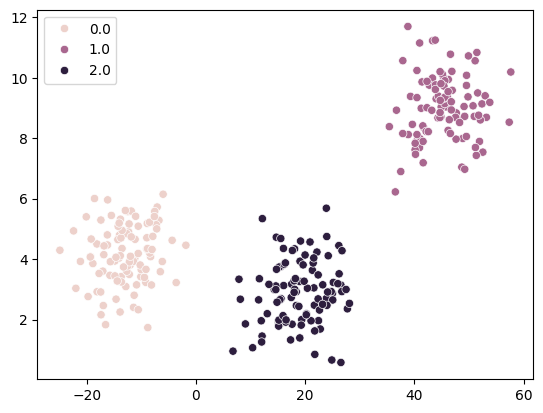

In [135]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=X[:, 2])

plt.show()

In [136]:
from sklearn.datasets import make_blobs

centroids = [[3,3], [-3, -2], [2, -3], [0, 0]]
X, y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

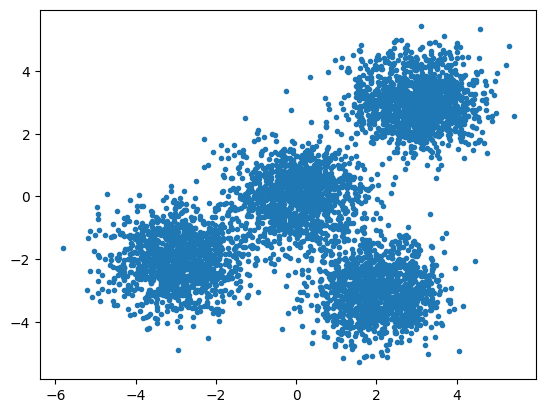

In [141]:
plt.scatter(x=X[:, 0], y=X[:, 1], marker='.')
plt.show()

In [142]:
km_model = KMeans(n_clusters=4, init='k-means++')

km_model.fit(X)

KMeans(n_clusters=4)

In [144]:
km_model.cluster_centers_

array([[ 0.01779191, -0.00535227],
       [ 3.01190199,  3.00680409],
       [ 2.02025964, -3.02163215],
       [-2.96899249, -2.01518762]])

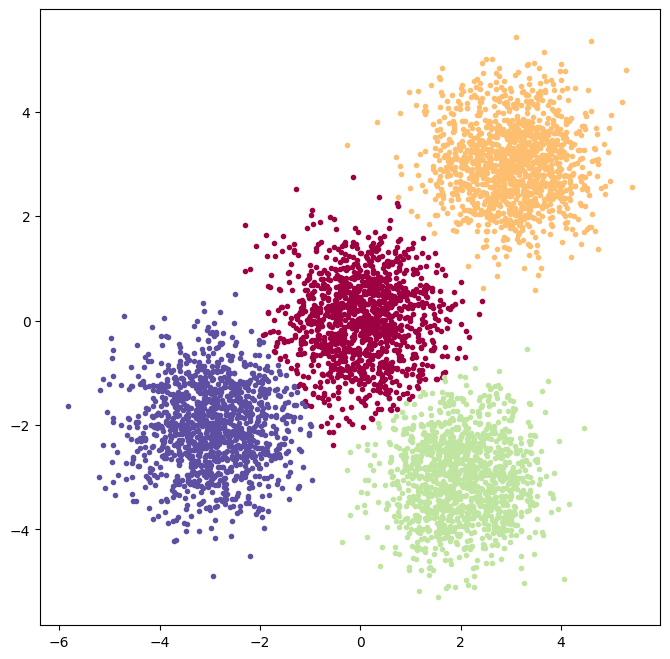

In [173]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

line = np.linspace(0, 1, len(set(km_model.labels_)))
colors = plt.cm.Spectral(line)

for k, color in zip(range(4), colors):

    members = X[km_model.labels_ == k]
    center = centroids[k]

    ax.scatter(x=members[:, 0], y=members[:, 1], marker='.', color=color)

plt.show()